# Projeto 1 - Introdução a Redes Neurais Artificiais
- Guilherme Araújo Mendes de Souza - 156437
- Renata Moura Barreto - 163983

Implementação e avaliação de um modelo de regressão utilizando uma rede neural do tipo MLP (Perceptron Multicamadas) em Python, desenvolvida do zero, sem o uso de bibliotecas prontas como PyTorch ou TensorFlow.

## Boston Housing Dataset

O Boston Housing Dataset (Conjunto de Dados de Moradia em Boston) é um conjunto de dados amplamente utilizado em aprendizado de máquina e estatística para prever o valor de imóveis com base em diferentes características de bairros na área de Boston. As variáveis incluem fatores como:

- RM: Número médio de quartos por habitação.
- LSTAT: Percentual da população de status socioeconômico mais baixo.
- PTRATIO: Razão aluno-professor na cidade.
- MEDV: Valor médio das casas (normalmente em milhares de dólares).

[Dataset disponível no Kaggle](https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd)

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from perceptron import MLP
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

### Carregamento dos dados

In [12]:
df = pd.read_csv('../data/Salary_Data.csv')

### Análise Inicial

In [13]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [15]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Limpeza e Tratamento dos Dados

In [17]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [18]:
print(df.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


### Pré-Processamento dos Dados

In [20]:
X = df.drop(columns=["Salary"]).values
y = df['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))  # Escalando y
y_test = scaler_y.transform(y_test.reshape(-1, 1))

### Treinamento do modelo

### Avaliação do modelo

In [44]:
mlp_regressor = MLP(n_inputs=X_train.shape[1], n_hidden=5, n_outputs=1, learning_rate=0.01, activation="relu", regularization=0.01)
mlp_regressor.fit(X_train, y_train, epochs=1000, patience=20)

predictions = mlp_regressor.predict(X_test)
predictions = scaler_y.inverse_transform(predictions)  # Revertendo a escala para interpretar

media_salarios = df["Salary"].mean()
y_test_original = scaler_y.inverse_transform(y_test)
r2 = r2_score(y_test_original, predictions)
mae = mean_absolute_error(y_test_original, predictions)

print("R² (Coeficiente de Determinação):", r2)
print("Erro Médio Absoluto (MAE):", mae)
print("Erro quadrático médio na regressão:", mean_squared_error(y_test_original, predictions))
print(f"A média dos salários é: {media_salarios}")

Epoch 0: Loss 1.0002349052269446, Max Weight Hidden 0.014348153510752214, Max Weight Output 0.019433939401192413
Early stopping at epoch 64. Best loss: 0.03723701829846615
R² (Coeficiente de Determinação): 0.8797256487131554
Erro Médio Absoluto (MAE): 7496.247291031025
Erro quadrático médio na regressão: 77613384.19157849
A média dos salários é: 76003.0


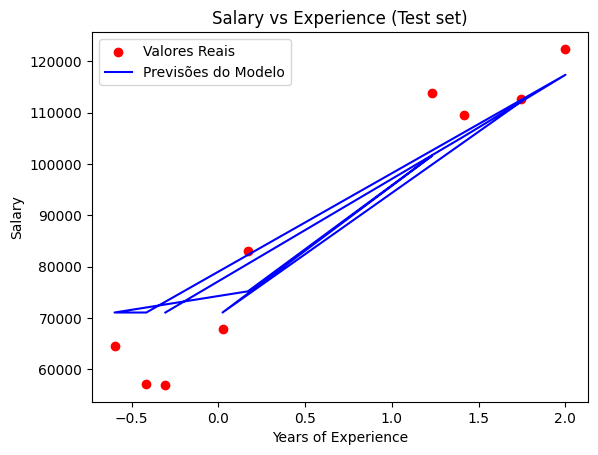

In [45]:
# Gráfico 1: Salários Reais vs Experiência (Previsão e Dados Reais)
plt.scatter(X_test, y_test_original, color='red', label='Valores Reais')
plt.plot(X_test, predictions, color='blue', label='Previsões do Modelo')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

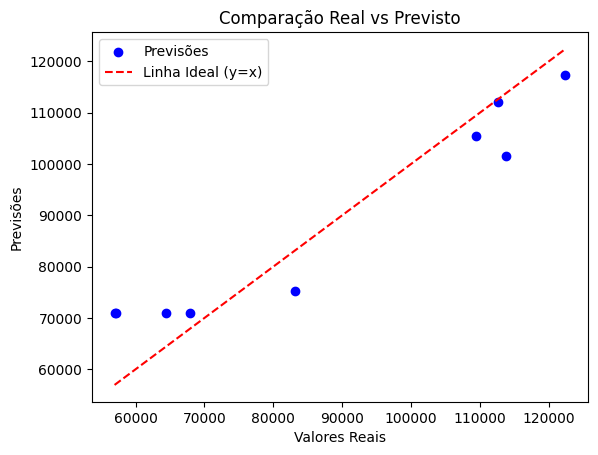

In [46]:
# Gráfico 2: Comparação Real vs Previsto
plt.scatter(y_test_original, predictions, color='blue', label='Previsões')
plt.plot([min(y_test_original), max(y_test_original)], 
        [min(y_test_original), max(y_test_original)], 
        color='red', linestyle='--', label='Linha Ideal (y=x)')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Comparação Real vs Previsto')
plt.legend()
plt.show()

Primeiros 10 valores reais vs preditos:
       Real       Previsto
0  112635.0  112102.479263
1   67938.0   71057.333333
2  113812.0  101599.040574
3   83088.0   75185.120592
4   64445.0   71057.333333
5   57189.0   71057.333333
6  122391.0  117354.198608
7  109431.0  105350.268677
8   56957.0   71057.333333


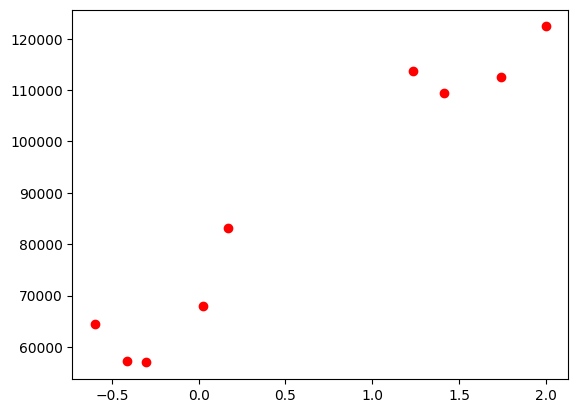

In [47]:
# Análise Quantitativa
print("Primeiros 10 valores reais vs preditos:")
comparison_df = pd.DataFrame({
    "Real": y_test_original.flatten(),
    "Previsto": predictions.flatten()
}).head(10)
print(comparison_df)

plt.scatter(X_test, y_test_original, color='red', label='Dados Reais')

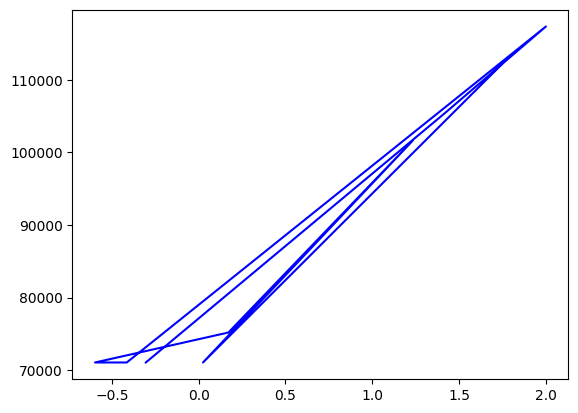

In [48]:
# Plotar as previsões do modelo (linha azul)
plt.plot(X_test, predictions, color='blue', label='Previsões do Modelo')

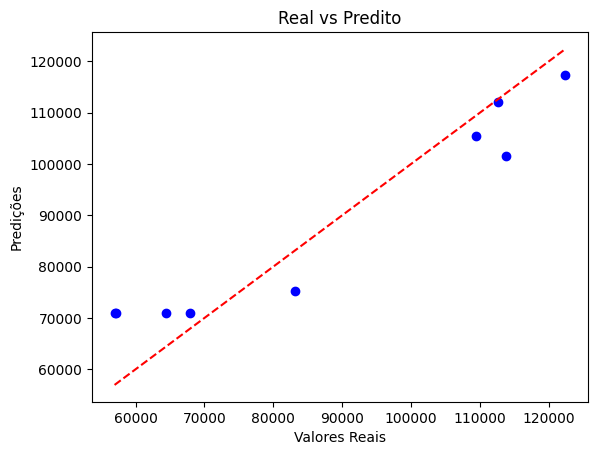

In [49]:
# Visualizar resultados
plt.scatter(y_test_original, predictions, color='blue')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Real vs Predito')
plt.show()

### Conclusão

Neste trabalho, foi desenvolvida uma Rede Neural MLP do zero, sem o uso de bibliotecas prontas, para realizar uma tarefa de regressão. Diversas configurações de hiperparâmetros foram testadas, incluindo o número de neurônios na camada oculta, taxa de aprendizado, função de ativação,  regularização e críterio de parada.

Após a realização de diversos experimentos com diferentes configurações, a seguinte arquitetura de MLP demonstrou ser a mais eficaz para o problema de regressão abordado:
Configuração Final

    Número de neurônios:
        Entrada: X_train.shape[1] (igual ao número de variáveis preditoras).
        Camada oculta: 5 neurônios.
        Saída: 1 neurônio (para predição contínua).
    Função de ativação: ReLU
    Taxa de aprendizado: 0.01, que garantiu estabilidade na convergência.
    Regularização L2: 0.01, essencial para evitar overfitting.
    Early stopping: Habilitado com paciência de 20 épocas, parando o treinamento na época 64, prevenindo sobreajuste.

Desempenho Obtido

    R² (Coeficiente de Determinação): 0.8797, indicando que o modelo explica 87,97% da variância dos dados.
    Erro Médio Absoluto (MAE): R$7.496,25, mostrando uma precisão sólida nas predições.
    Erro Quadrático Médio (MSE): R$77.613.384,19, com penalização aceitável de erros extremos.
    Loss final: 0.0372, evidenciando o aprendizado efetivo.

Considerações Finais

Essa configuração mostrou-se altamente eficaz, dada a sua simplicidade e eficiência visto que a escolha de uma única camada oculta com apenas 5 neurônios demonstrou ser suficiente para capturar a complexidade do problema, mantendo o modelo leve e rápido. Além disso, a combinação de regularização L2 e early stopping garantiu que o modelo generalizasse bem para dados de teste.
